<a href="https://colab.research.google.com/github/FrankHolzkamp/fep/blob/main/numpy_lernen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

In [ ]:
!echo $PYTHONPATH

/env/python


In [1]:
import numpy as np
from scipy import stats,integrate
import matplotlib.pyplot as plt
from datetime import datetime
import logging # error reporting


In [33]:
q_range = np.arange(0.01,1.,0.01) # q1 ranges from 0.1 to 0.9 at 0.01 increments
print(q_range)
logs2=[]
log=[]

for q0 in q_range:
  logs2.append(-np.log2(q0))
  log.append(-np.log(q0))
print(log)
print(logs2)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99]
[4.605170185988091, 3.912023005428146, 3.506557897319982, 3.2188758248682006, 2.995732273553991, 2.8134107167600364, 2.6592600369327783, 2.5257286443082556, 2.4079456086518722, 2.302585092994046, 2.2072749131897207, 2.120263536200091, 2.0402208285265546, 1.9661128563728327, 1.897119984885881, 1.8325814637483102, 1.7719568419318752, 1.7147984280919266, 1.6607312068216509, 1.6094379124341003, 1.5606477482646683, 1.5141277326297755, 1.4696759700589417, 1.4271163556401456, 1.3862943611198906, 1.3

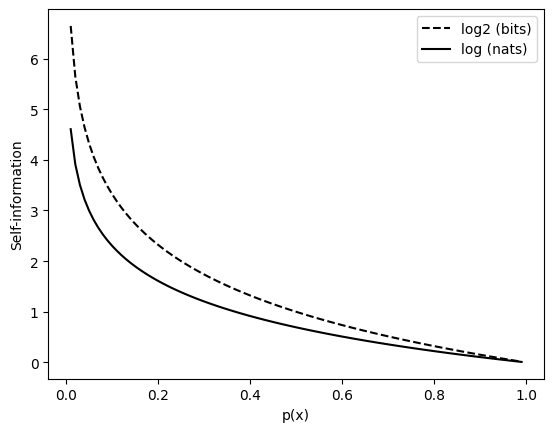

In [35]:
fig = plt.figure()
ax = plt.axes()
ax.plot(q_range,logs2,color='k',linestyle='--',label="log2 (bits)")
ax.plot(q_range,log,color='k',linestyle='-',label="log (nats)")


ax.legend()

    ## 5b. Axis labels
plt.xlabel("p(x)")
plt.ylabel("Self-information")

    ## 5c. Display plot
plt.show()

[[0.4 0.2]
 [0.1 0.3]]
[[0.4 0.1]
 [0.2 0.3]]
[0.6 0.4]
[[0.66666667 0.33333333]
 [0.25       0.75      ]]


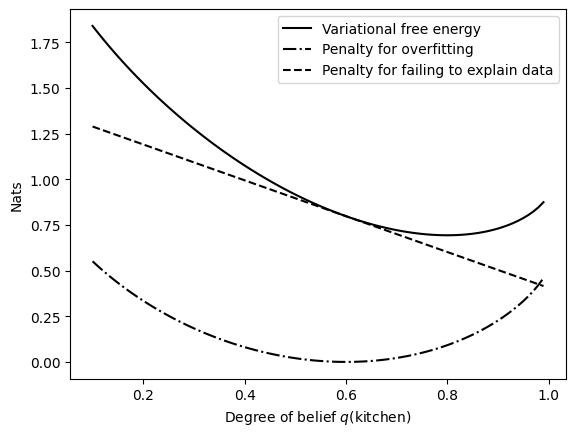

In [ ]:

q_range = np.arange(0.1,1.,0.01) # q1 ranges from 0.1 to 0.9 at 0.01 increments

    ## 2. Choose a generative model p(w,x)
    ##  joint probability of w1 and x1: 0.4
    ##  joint probability of w1 and x2: 0.2
    ##  joint probability of w2 and x1: 0.1
    ##  joint probability of w2 and x2: 0.3
    ##  the implied marginal distributions are p(w) = (0.6,0.4) and p(x) = (0.5,0.5)
p = np.array([[0.4,0.2],[0.1,0.3]])

    ## 3. Initialise
F_0_series = [] # values of F when x=0

    ## SFM 2021-06-07: plot overfitting penalty (KLD) and explaining penalty
p_w = p.sum(axis=1)
print(p)
print(p.T)
print(p_w)
print(p_x_w)
p_x_w = p.T/p_w
p_x_w = p_x_w.T
D_0_series = []
E_0_series = []

F_check_series = [] # confirm F = D+E

    ## Calculate free energy for various estimates q
for q0 in q_range:
        ## Create the estimated distribution across world states
    q = np.array([q0,1-q0])
 ##   print(q)

    F_0 = cl.vfe_discrete(p,q,0) # free energy when x=0; default units are nats

    F_0_series.append(F_0)

    D_0_series.append(stats.entropy(q,p_w))

        ## Penalty-for-explaining sum
    e_sum = 0
    i=0
    for q_value in q:
        e_sum+=q_value*np.log(1/p_x_w[i,0]) # 0th value of x, ith value of w
        i+=1
    E_0_series.append(e_sum)

    F_check_series.append(stats.entropy(q,p_w)+e_sum)

    ## 5. Plot

    ## 5a. Data and data labels
fig = plt.figure()

ax = plt.axes()
ax.plot(q_range,F_0_series,color='k',linestyle='-',label="Variational free energy")

    ## SFM 2021-06-07: penalties
ax.plot(q_range,D_0_series,color='k',linestyle='-.',label="Penalty for overfitting")
ax.plot(q_range,E_0_series,color='k',linestyle='--',label="Penalty for failing to explain data")
## ax.plot(q_range,F_check_series,label="VFE check")

ax.legend()

    ## 5b. Axis labels
plt.xlabel('Degree of belief $q($kitchen$)$')
plt.ylabel('Nats')

    ## 5c. Display plot
plt.show()